In [22]:
from PIL import Image
import numpy as np
from skimage import measure, filters, morphology

# Parte 6
## 6.1 Binarizar la imagen:

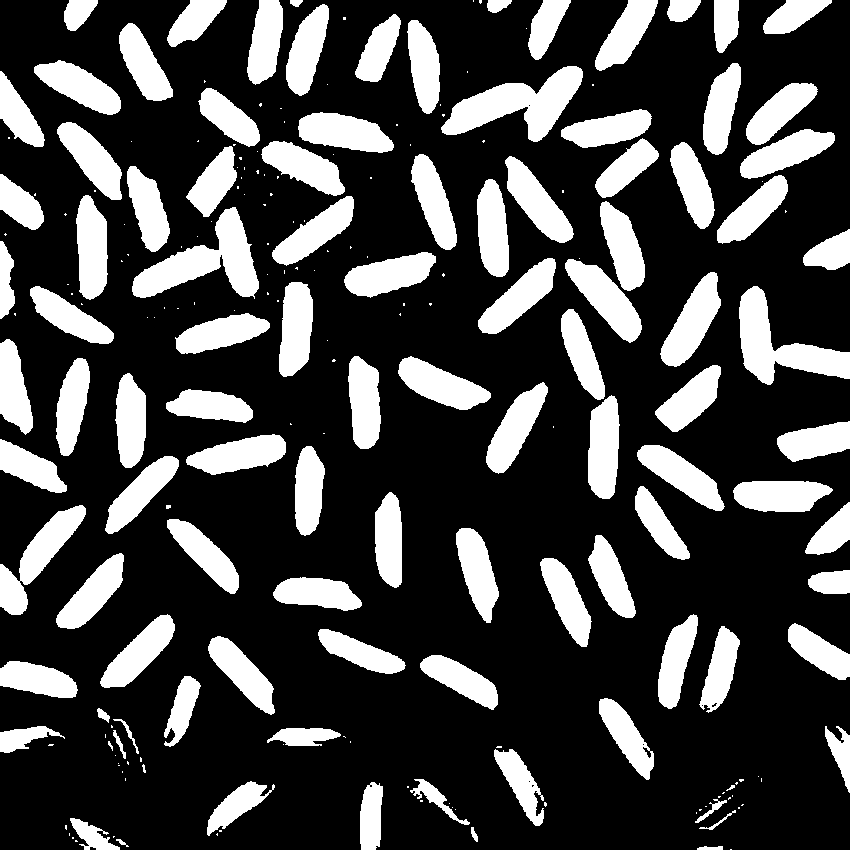

In [29]:
img = Image.open('assets/rice.jpg')

def binarize(img):
    
    if img.mode == 'RGBA' or img.mode == 'RGB':
        img = img.convert('L')
    
    img = np.array(img)
    
    binary = (img > 128).astype(np.uint8) * 255

    return Image.fromarray(binary), binary

bin_image, bin_array = binarize(img)

bin_image

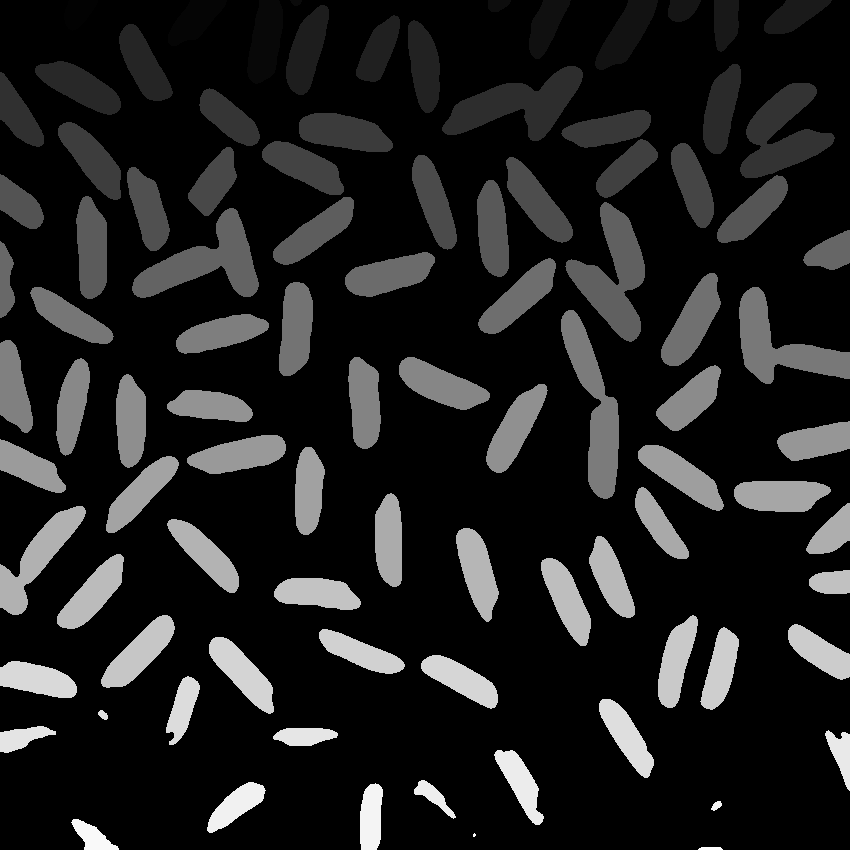

In [25]:
def structures(md):
    median = filters.median(bin_array, morphology.disk(md))
    labeled_filtered, num_features_filtered = measure.label(median, background=0, return_num=True)
    labeled_filtered_image = Image.fromarray((labeled_filtered * 255 / labeled_filtered.max()).astype(np.uint8))
    display(labeled_filtered_image)
    return num_features_filtered
arroz = structures(5) 

## 6.2 Contar granos de arroz:

In [24]:
print("Numero de granos de arroz: {}".format(arroz))

Numero de granos de arroz: 95


# Parte 7
## 7.1 Binarizar La imagen

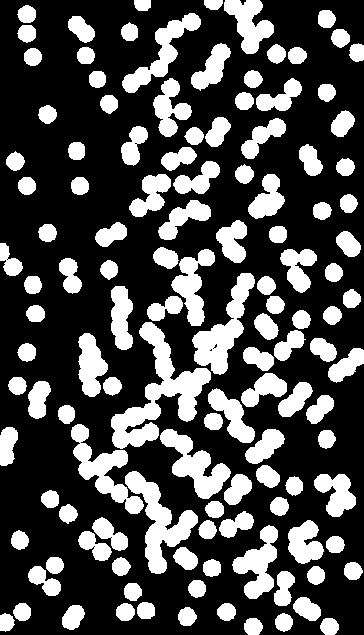

In [30]:
img = Image.open('assets/microscope.png')

bin_image, bin_array = binarize(img)

bin_image

## 7.2 Obtener componente conexa de menor tamaño

The smallest connected component has 158.0 pixels.


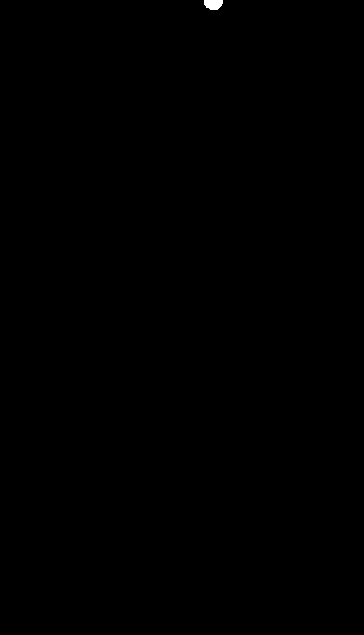

In [47]:
from skimage import measure

def find_smallest_component(image):
    labeled_image, num_features = measure.label(image, background=0, return_num=True)
    component_sizes = measure.regionprops(labeled_image)
    smallest_component = min(component_sizes, key=lambda x: x.area)
    return smallest_component, labeled_image

smallest_component, labeled_image = find_smallest_component(bin_array)
num_pixels = smallest_component.area

colored_array = labeled_image.copy().astype(np.uint8)
colored_array[labeled_image != smallest_component.label] = 0
colored_array[labeled_image == smallest_component.label] = 255

colored_image = Image.fromarray(colored_array)

print("The smallest connected component has {} pixels.".format(num_pixels))
colored_image

## 7.3 Recortar el componente de mayor tamaño. 

The largest connected component has 4175.0 pixels.


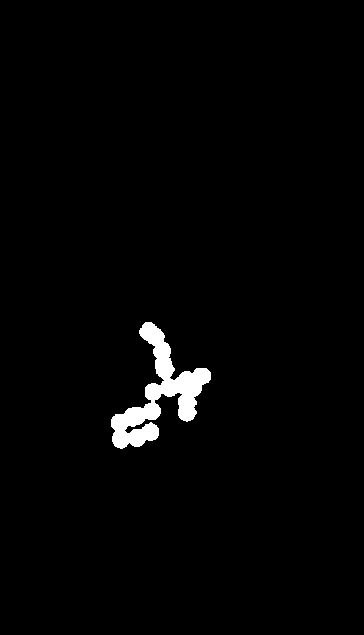

In [48]:
def find_largest_component(image):
    labeled_image, num_features = measure.label(image, background=0, return_num=True)
    component_sizes = measure.regionprops(labeled_image)
    largest_component = max(component_sizes, key=lambda x: x.area)
    return largest_component, labeled_image

largest_component, labeled_image = find_largest_component(bin_array)
num_pixels = largest_component.area

colored_array = labeled_image.copy().astype(np.uint8)
colored_array[labeled_image != largest_component.label] = 0
colored_array[labeled_image == largest_component.label] = 255

colored_image = Image.fromarray(colored_array)

print("The largest connected component has {} pixels.".format(num_pixels))
colored_image


## 7.4 Cuantas celulas hay en total. 

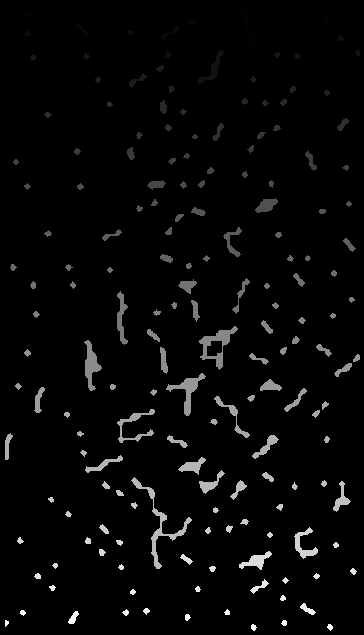

Numero de celulas: 175


In [41]:
from scipy.ndimage import binary_erosion

def structures(md):
    median = filters.median(bin_array, morphology.disk(md))
    eroded = binary_erosion(median, structure=np.ones((10, 10)))  # Increase the size of the structuring element
    labeled_filtered, num_features_filtered = measure.label(eroded, background=0, return_num=True)
    labeled_filtered_image = Image.fromarray((labeled_filtered * 255 / labeled_filtered.max()).astype(np.uint8))
    display(labeled_filtered_image)
    return num_features_filtered

cells = structures(1)
print("Numero de celulas: {}".format(cells))

# Parte 8
**A**: Erosion. El elemento estructurante es una U con traslacion hacia un lado. 

**B**: Erosion. El elemento estructurante son los dos puntos abajo. 

**C**: Erosion seguida por dilatacion, ya que los bordes estan redondeados. El elemento estructurante son dos columnas a los lados. 

**D**: Dilatacion seguida por erosion, ya que es mas grande que la imagen original pero los bordes estan redondeados. El elemento estructurante es la U. 